In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as PLT
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight

2022-11-28 09:05:29.303522: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
BCSIZE = 100
IMG_SHAPE = (250,250)

data_generator_train = ImageDataGenerator(
                    rescale=1.0/255.0,
                    zoom_range=.6,
                    horizontal_flip=True,
                    vertical_flip=True,
                    rotation_range=90,
                    width_shift_range=.4,
                    height_shift_range=.4,
                    shear_range=.6,
                    fill_mode='nearest',
                )

train_data = data_generator_train.flow_from_directory(
                        directory='../../img/catvsdog/train/',
                        class_mode='binary',#'categorical'
                        batch_size=BCSIZE,
                        target_size=IMG_SHAPE,
                        shuffle=True,
                        color_mode='rgb',#'grayscale'
                        )

data_generator_test = ImageDataGenerator(rescale=1.0/255.0)
test_data = data_generator_test.flow_from_directory(
                        directory='../../img/catvsdog/test/',
                        class_mode='binary',
                        batch_size=BCSIZE,
                        target_size=IMG_SHAPE,
                        shuffle=True,
                        color_mode='rgb',
                        )

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
train_data.classess 

In [13]:
model = Sequential()
model.add(Conv2D(2,3,activation='relu',padding='same',input_shape=(*IMG_SHAPE,3)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit_generator(
            train_data,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data),
            epochs=10
        )

/tmp/ipykernel_3130/1058973003.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
10/10 [==============================] - 44s 4s/step - loss: 3.4690 - accuracy: 0.4850 - val_loss: 1.6273 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 41s 4s/step - loss: 2.2704 - accuracy: 0.4880 - val_loss: 1.4798 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 39s 4s/step - loss: 1.1682 - accuracy: 0.4990 - val_loss: 1.2231 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 38s 4s/step - loss: 0.9085 - accuracy: 0.4900 - val_loss: 0.9497 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 41s 4s/step - loss: 0.7743 - accuracy: 0.5490 - val_loss: 0.7197 - val_accuracy: 0.5075
Epoch 6/10
10/10 [==============================] - 43s 4s/step - loss: 0.7078 - accuracy: 0.5090 - val_loss: 0.7111 - val_accuracy: 0.5025
Epoch 7/10
10/10 [==============================] - 43s 4s/step - loss: 0.7166 - accuracy: 0.4920 - val_loss: 0.7114 - val_accuracy: 0.4975
Epoch 8/10
10/10 [==

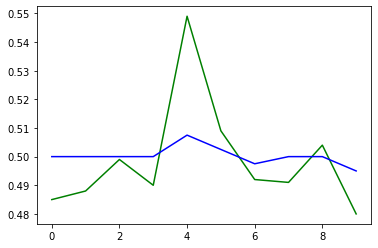

In [15]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='blue')